In [6]:
# Import `tensorflow`
import tensorflow as tf
import os
import skimage
from skimage import transform
import numpy as np

# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)

Tensor("Mul:0", shape=(4,), dtype=int32)


In [7]:
with tf.Session() as sess:
  output = sess.run(result)
  print(output)
config=tf.ConfigProto(log_device_placement=True)

[ 5 12 21 32]


In [8]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "C:/Users/Sunny/Downloads"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_directory)

# conversion of images into arrays
images1 = np.array(images) 
# Print the `images` dimensions
print(images1.ndim)

# Print the number of `images`'s elements
print(images1.size)

# Print the first instance of `images`
images1[0]

1
4575


array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [9]:
# conversion of images into arrays
labels1 = np.array(labels) 

# Print the `labels` dimensions
print(labels1.ndim)

# Print the number of `labels`'s elements
print(labels1.size)

# Count the number of labels
print(len(set(labels1)))

1
4575
62


In [10]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

<Figure size 640x480 with 1 Axes>

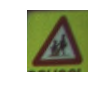

shape: (62, 61, 3), min: 3, max: 160


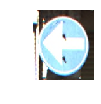

shape: (110, 96, 3), min: 3, max: 255


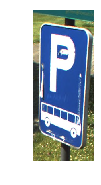

shape: (379, 153, 3), min: 0, max: 255


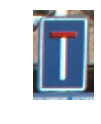

shape: (100, 68, 3), min: 17, max: 255


In [11]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

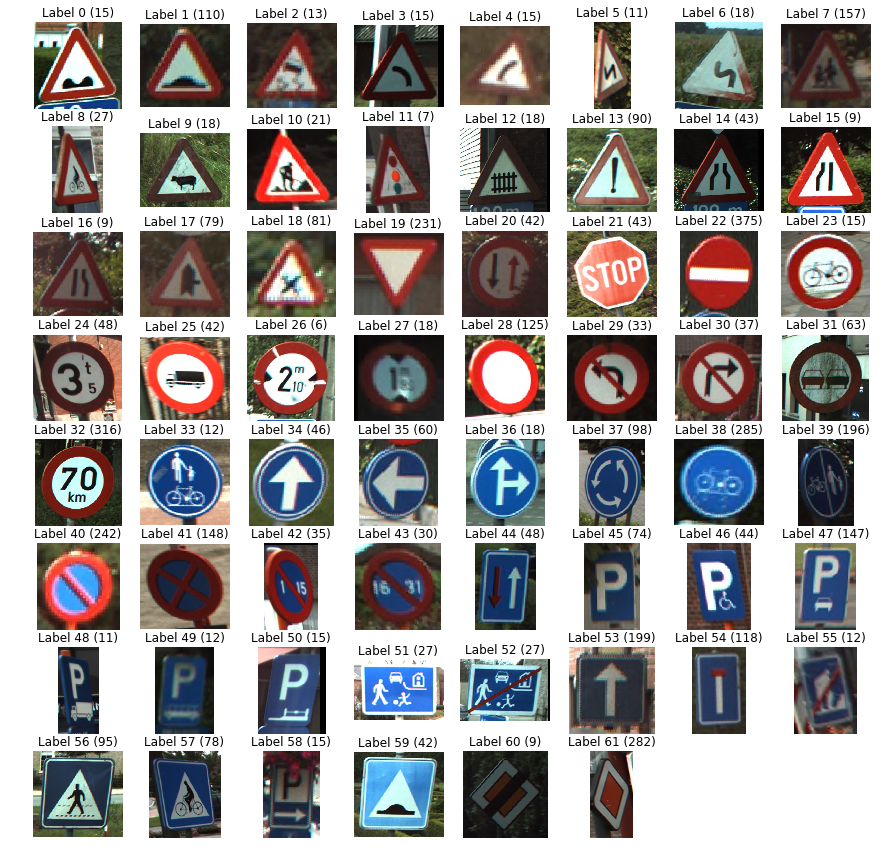

In [14]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [18]:
# Import the `transform` module from `skimage`
from skimage import transform
from skimage.color import rgb2gray

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]
# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

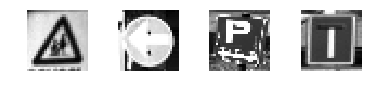

In [19]:
import matplotlib.pyplot as plt

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [21]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_1/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


In [22]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 

In [23]:
tf.set_random_seed(1234)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(201):
        _, loss_value = sess.run([train_op, loss], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)

Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape